In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [2]:
# Đọc dữ liệu từ tập tin CSV
data = pd.read_csv('RETAIL.csv')
df=pd.DataFrame(data,columns=['Age','Product Category','Total Amount'])
df

,Age,Product Category,Total Amount
0,34,Beauty,150
1,26,Clothing,1000
2,50,Electronics,30
3,37,Clothing,500
4,30,Beauty,100
...,...,...,...
995,62,Clothing,50
996,52,Beauty,90
997,23,Beauty,100
998,36,Electronics,150


In [3]:
# Mã hóa thuộc tính phân loại
le = LabelEncoder()
df['ProductCategoryID'] = le.fit_transform(df['Product Category'])

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
df[['Age', 'Total Amount']] = scaler.fit_transform(df[['Age', 'Total Amount']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

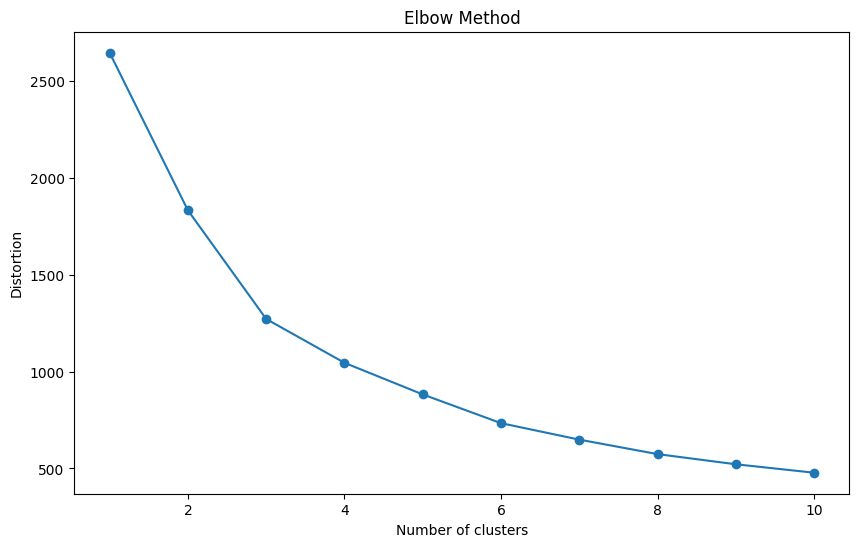

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Chuẩn bị dữ liệu
X = df[['Age', 'ProductCategoryID', 'Total Amount']]

# Tìm số lượng cụm tối ưu bằng phương pháp Elbow
distortions = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()


In [5]:
# Áp dụng K-Means với số lượng cụm tối ưu
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


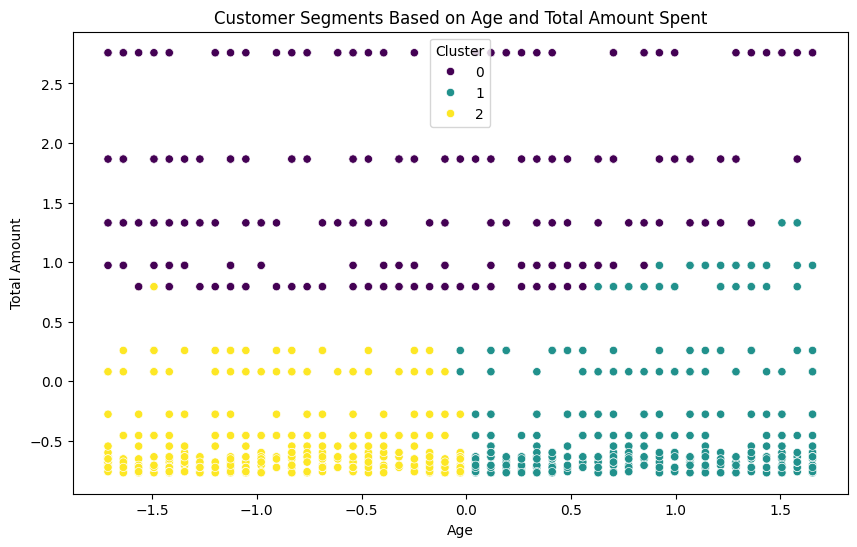

   Cluster       Age  Total Amount Product Category
0        0 -0.286078      1.607954         Clothing
1        1  0.877542     -0.410171         Clothing
2        2 -0.886720     -0.535979      Electronics


In [6]:
import seaborn as sns

# Trực quan hóa các cụm
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Total Amount', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segments Based on Age and Total Amount Spent')
plt.xlabel('Age')
plt.ylabel('Total Amount')
plt.legend(title='Cluster')
plt.show()

# Xem thông tin chi tiết về từng cụm
cluster_analysis = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Total Amount': 'mean',
    'Product Category': lambda x: x.value_counts().index[0]  # Sản phẩm phổ biến nhất trong mỗi cụm
}).reset_index()

print(cluster_analysis)
